In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

import pulser
from pulser.devices import DigitalAnalogDevice, MockDevice
from pulser.register import Register

import sys
sys.path.append('../')

from source.qubo import anneal, plot_distribution, draw_solutions

In [2]:
import warnings
# ignore RuntimeWarning: divide by zero encountered in log10
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [3]:
def counts_vs_detuning_5(dx, delta_start, delta_end, delta_step, Omega:float=1.5*np.pi, T:int=1000, delta_plot:float=10.0):
    coords = [
        [-dx, 0], 
        [0, 0], 
        [dx, 0],
        [2*dx, 0], 
        [3*dx, 0], 
        ]
    qubits = {f"q{i}": coord for (i, coord) in enumerate(coords)}
    reg = Register(qubits)

    res = []
    for d_i in np.arange(delta_start, delta_end, delta_step):
        delta_i = - d_i
        delta_f = d_i
        counts:dict = anneal(reg, Omega, delta_i, delta_f, draw_distribution=False, T=T, show=False) # dict of counts
        res.append([delta_i, counts])

    dis = [r[0] for r in res] # detuning
    # states = {s for s in res[0][1].keys()} # states
    fig, ax = plt.subplots(1, 3, figsize=(18, 4.5))
    states = ["00000", "01010", "10101", "10001", "11111", "10000", "00001"]
    colors = ["blue", "orange", "green", "red", "purple", "brown", "pink", "gray", "olive", "cyan", "black", "yellow", "magenta", "teal", "lavender", "maroon", "navy", "aquamarine", "gold", "coral"]
    ls = ["-", "-", "-", "-", "-", "--", "--"]
    plt.sca(ax[0])
    for i, s in enumerate(states):
        counts = [r[1][s] for r in res]
        plt.plot(dis, counts, label=s, color=colors[i], ls=ls[i])
    plt.axvline(x=delta_plot, color='gray', ls='--', lw=2.5, alpha=0.8, label=r"$\delta_{\mathrm{plot}}$")
    plt.legend()
    plt.xlabel(r"$\delta$")
    plt.ylabel("Counts")
    plt.title(f"Counts vs. detuning, $\Omega = {Omega:.2f}$, $T = {T}$, $dx = {dx}$")
    plt.sca(ax[1])
    ii = [i for i, r in enumerate(res) if r[0] == delta_plot][0]
    draw_solutions(reg, res[ii][1], n=1, draw_graph=True, show=False, custom_ax=ax[1])

    plt.sca(ax[2])
    plot_distribution(res[ii][1], show=False, custom_ax=ax[2])
    ax[2].set_title(f"Distribution at $\delta={delta_plot}$")
    plt.tight_layout()
    plt.show()

<>:33: SyntaxWarning: invalid escape sequence '\O'
<>:40: SyntaxWarning: invalid escape sequence '\d'
<>:33: SyntaxWarning: invalid escape sequence '\O'
<>:40: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_201841/630897887.py:33: SyntaxWarning: invalid escape sequence '\O'
  plt.title(f"Counts vs. detuning, $\Omega = {Omega:.2f}$, $T = {T}$, $dx = {dx}$")
/tmp/ipykernel_201841/630897887.py:40: SyntaxWarning: invalid escape sequence '\d'
  ax[2].set_title(f"Distribution at $\delta={delta_plot}$")


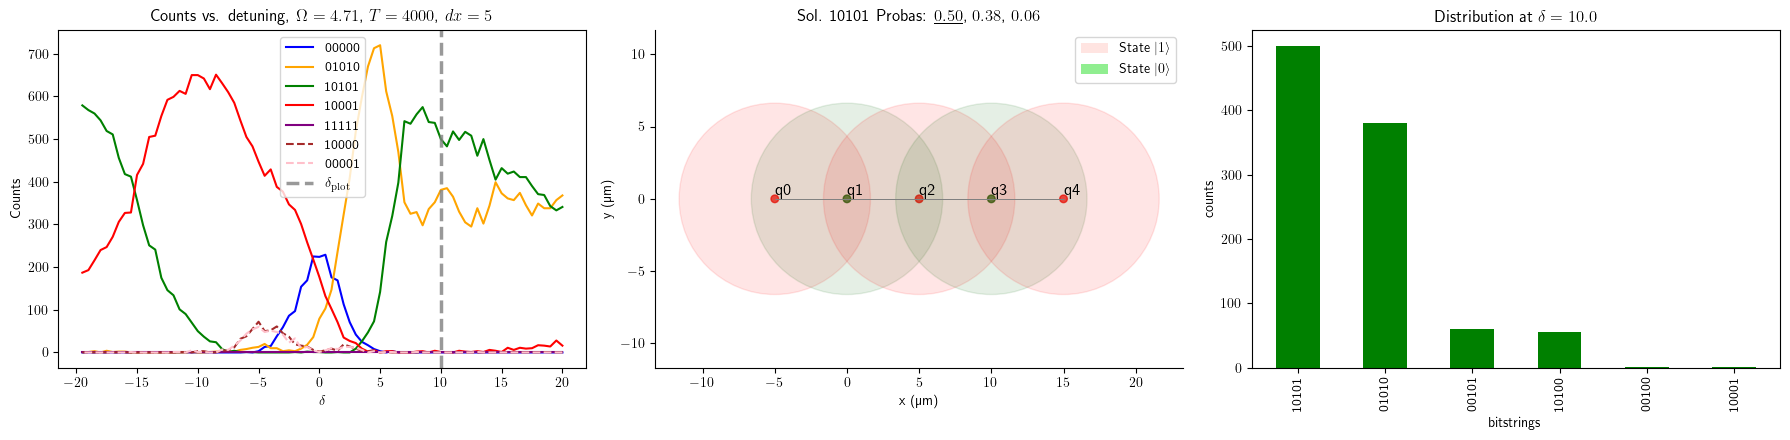

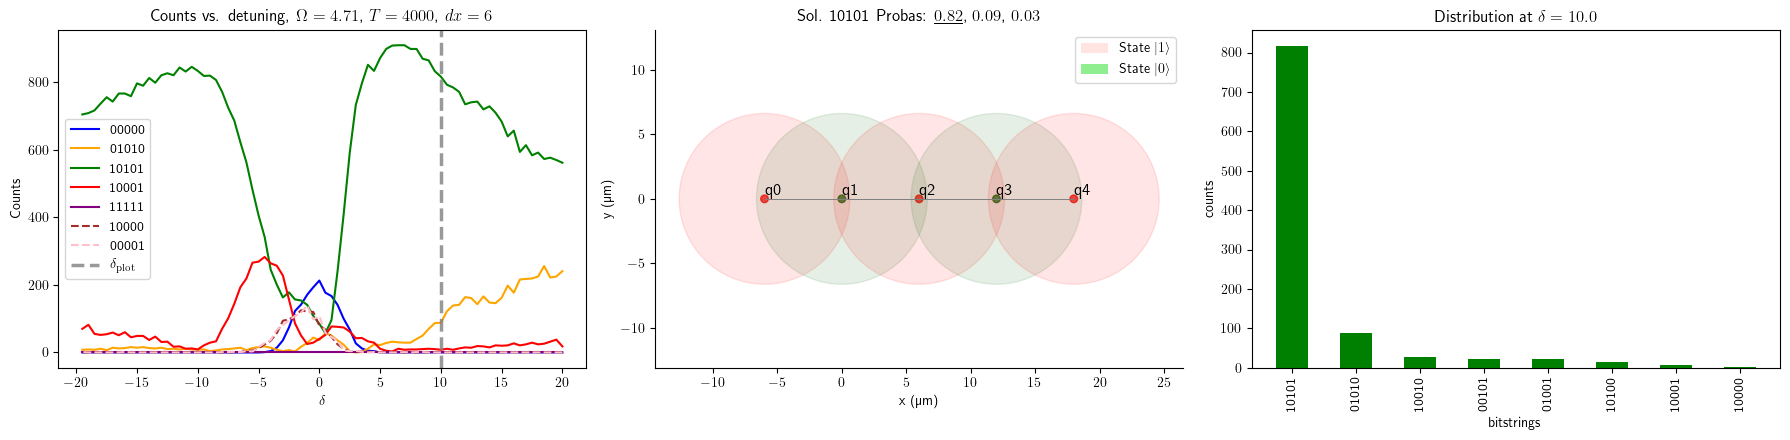

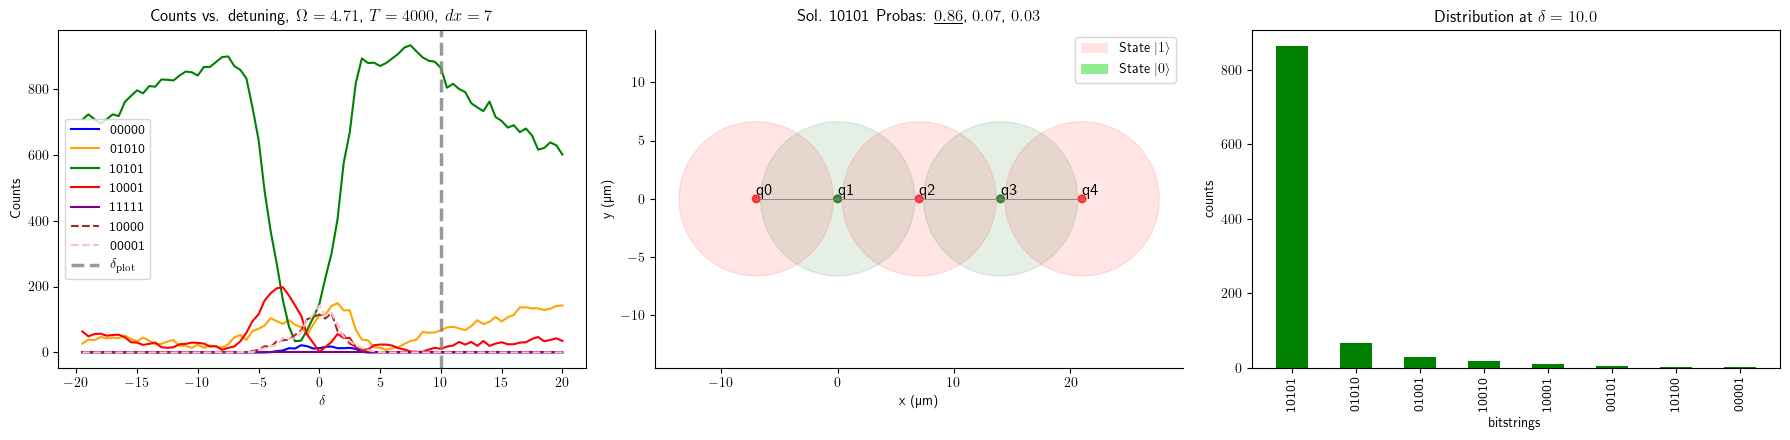

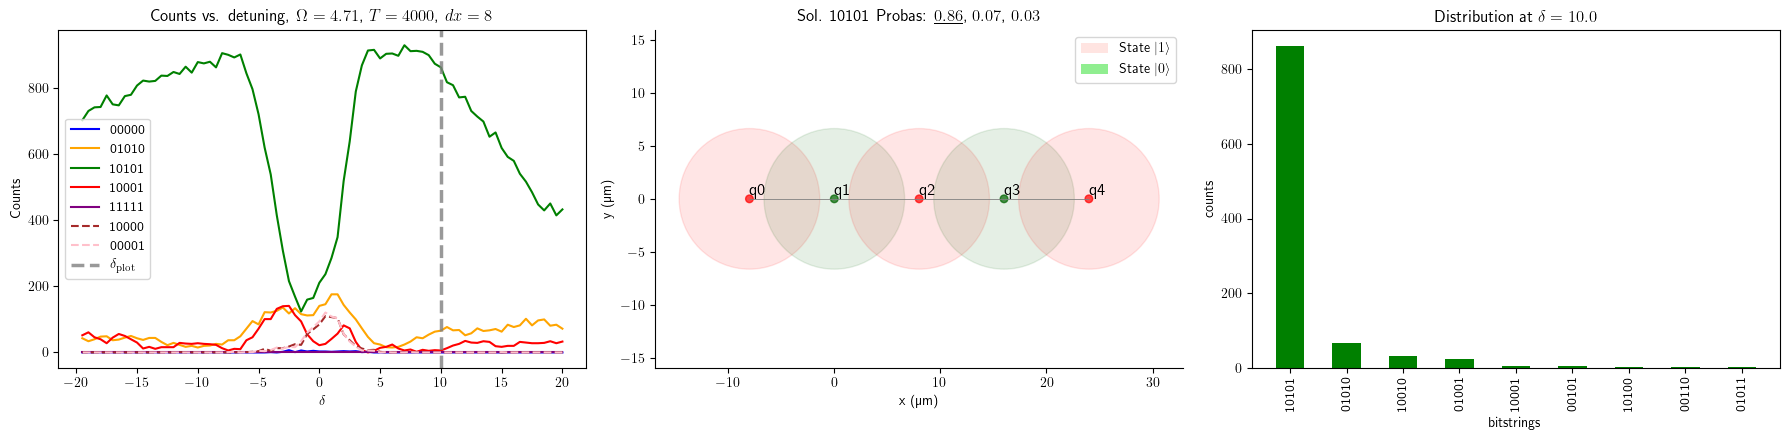

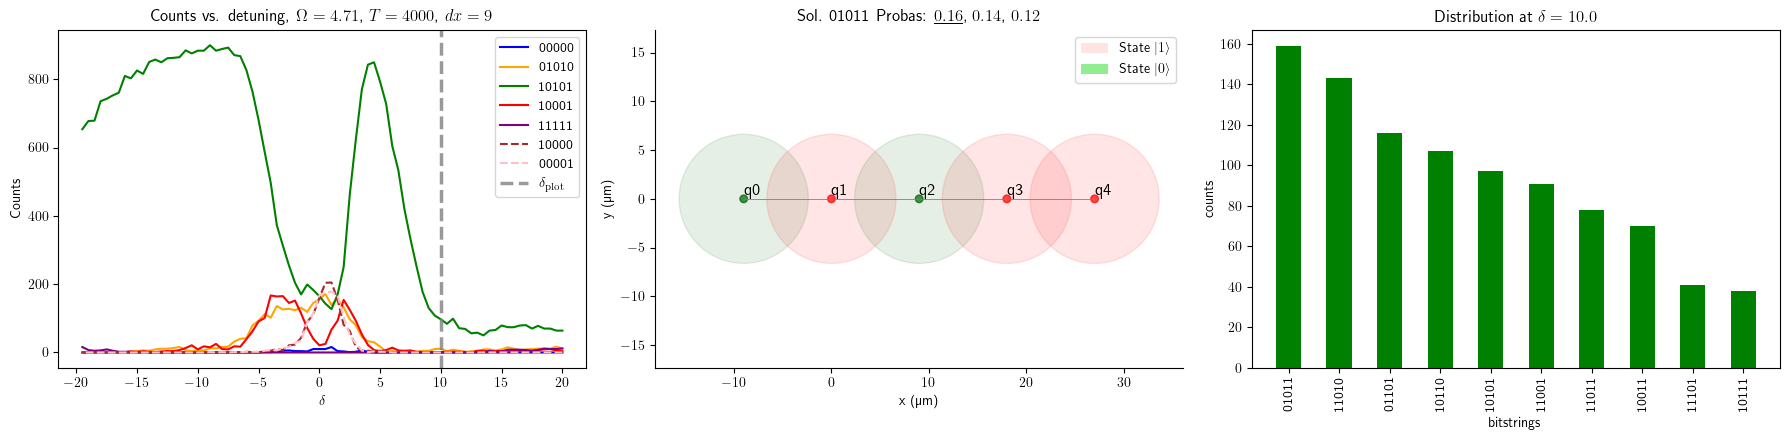

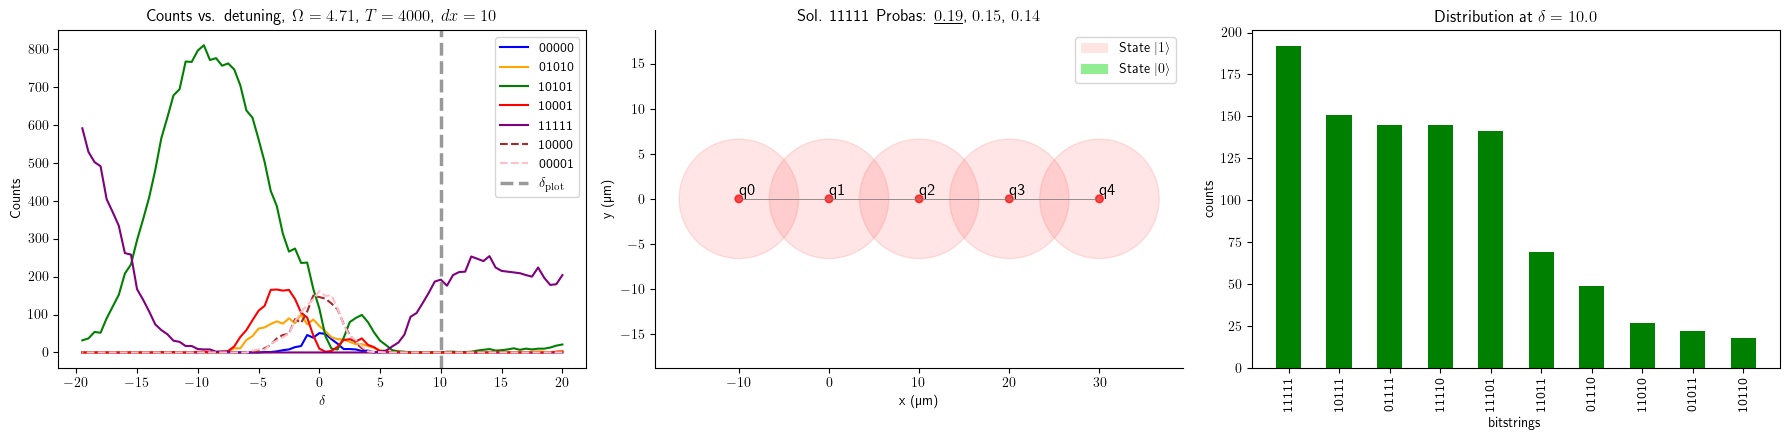

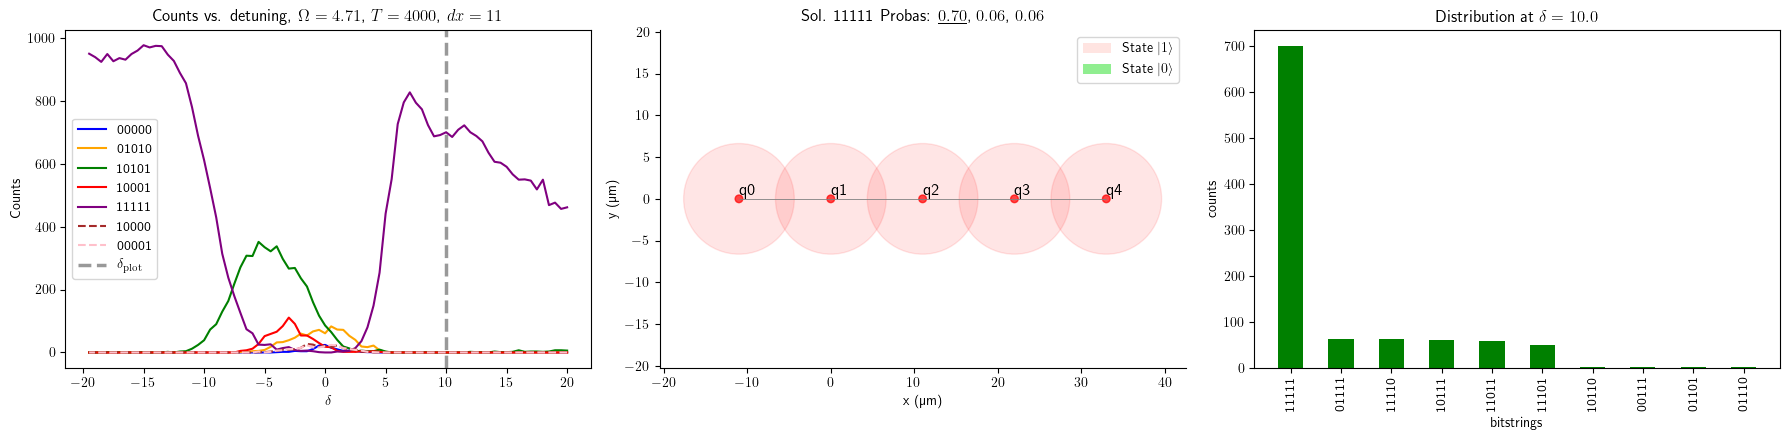

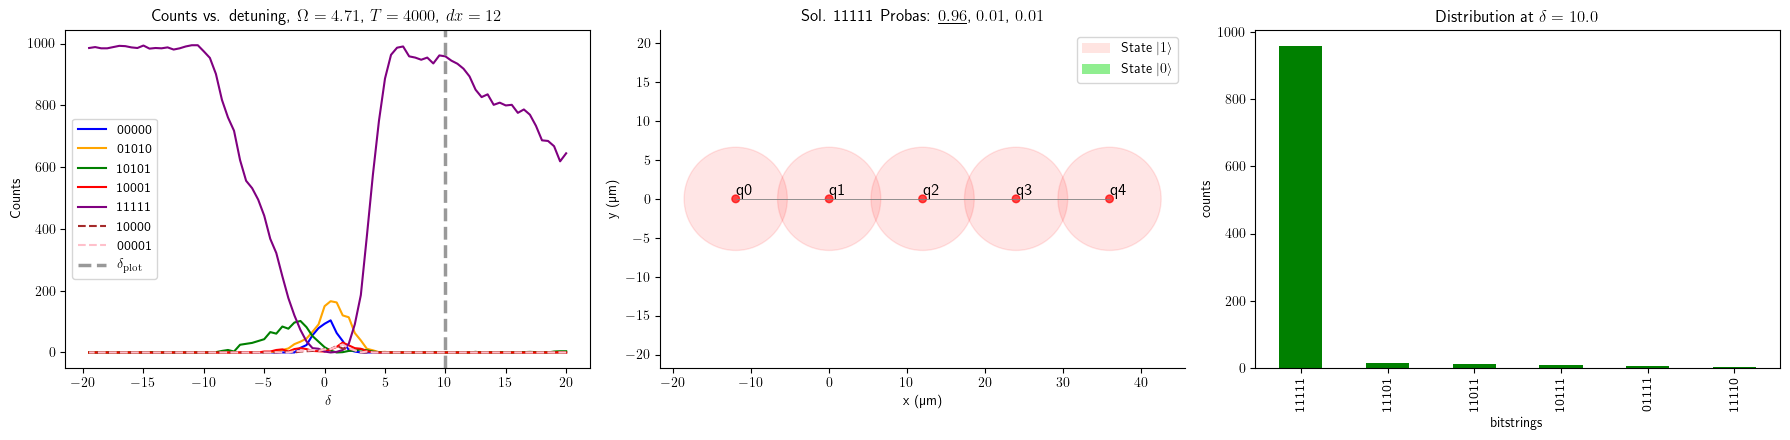

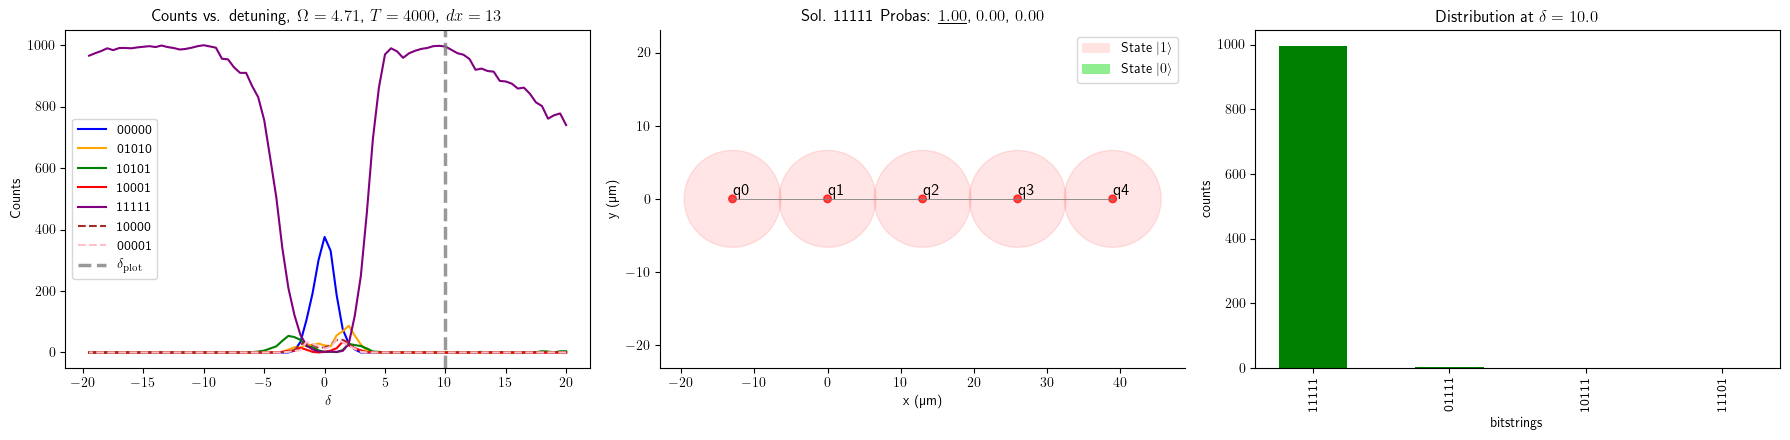

In [5]:
for dx in [5, 6, 7, 8, 9, 10, 11, 12, 13]:
    counts_vs_detuning_5(dx, -20, 20, 0.5, Omega = 1.5 * np.pi, T = 4000)

We see that 10101 is usually more probable than 01010, but we want both to be equally probable.

One way of doing this is by adjusting the weights of the inner nodes by a factor of 2.
This needs __local detuning__.

Another way without local detuning is to add anchors, i.e. extra atoms.

In [6]:
def counts_vs_detuning_5_with_anchors(dx, delta_start, delta_end, delta_step, Omega:float=1.5*np.pi, T:int=1000, adx=0.5, delta_plot:float=-12.5):
    coords = [
        [-2*dx, 0], 
        [-dx, 0], 
        [0, 0], 
        [dx, 0],
        [2*dx, 0], 
        [-3*dx - adx, 0],
        [3*dx + adx, 0],
        ]
    qubits = {f"q{i}": coord for (i, coord) in enumerate(coords)}
    reg = Register(qubits)

    res = []
    for d_i in np.arange(delta_start, delta_end, delta_step):
        delta_i = - d_i
        delta_f = d_i
        counts:dict = anneal(reg, Omega, delta_i, delta_f, draw_distribution=False, T=T, show=False, 
                             draw_pulse = True if d_i == delta_plot else False
                             ) # dict of counts
        res.append([delta_i, counts])

    dis = [r[0] for r in res] # detuning
    # states = {s for s in res[0][1].keys()} # states
    fig, ax = plt.subplots(1, 3, figsize=(18, 4.5))
    states = ["0000011", "0101011", "1010111", "1000111", "1111111", "1000011", "0000111"]
    colors = ["blue", "orange", "green", "red", "purple", "brown", "pink", "gray", "olive", "cyan", "black", "yellow", "magenta", "teal", "lavender", "maroon", "navy", "aquamarine", "gold", "coral"]
    ls = ["-", "-", "-", "-", "-", "--", "--"]
    plt.sca(ax[0])
    for i, s in enumerate(states):
        counts = [r[1][s] for r in res]
        plt.plot(dis, counts, label=s, color=colors[i], ls=ls[i])
    plt.axvline(x=delta_plot, color='gray', ls='--', lw=2.5, alpha=0.8, label=r"$\delta_{\mathrm{plot}}$")
    plt.legend()
    plt.xlabel(r"$\delta$")
    plt.ylabel("Counts")
    plt.title(f"Counts vs. detuning, $\Omega = {Omega:.2f}$, $T = {T}$, $dx = {dx}$")
    plt.sca(ax[1])
    ii = [i for i, r in enumerate(res) if r[0] == delta_plot][0]
    draw_solutions(reg, res[ii][1], n=1, draw_graph=True, show=False, custom_ax=ax[1])

    plt.sca(ax[2])
    plot_distribution(res[ii][1], show=False, custom_ax=ax[2])
    ax[2].set_title(f"Distribution at $\delta={delta_plot}$")
    plt.tight_layout()
    plt.show()

<>:37: SyntaxWarning: invalid escape sequence '\O'
<>:44: SyntaxWarning: invalid escape sequence '\d'
<>:37: SyntaxWarning: invalid escape sequence '\O'
<>:44: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_201841/4107843613.py:37: SyntaxWarning: invalid escape sequence '\O'
  plt.title(f"Counts vs. detuning, $\Omega = {Omega:.2f}$, $T = {T}$, $dx = {dx}$")
/tmp/ipykernel_201841/4107843613.py:44: SyntaxWarning: invalid escape sequence '\d'
  ax[2].set_title(f"Distribution at $\delta={delta_plot}$")


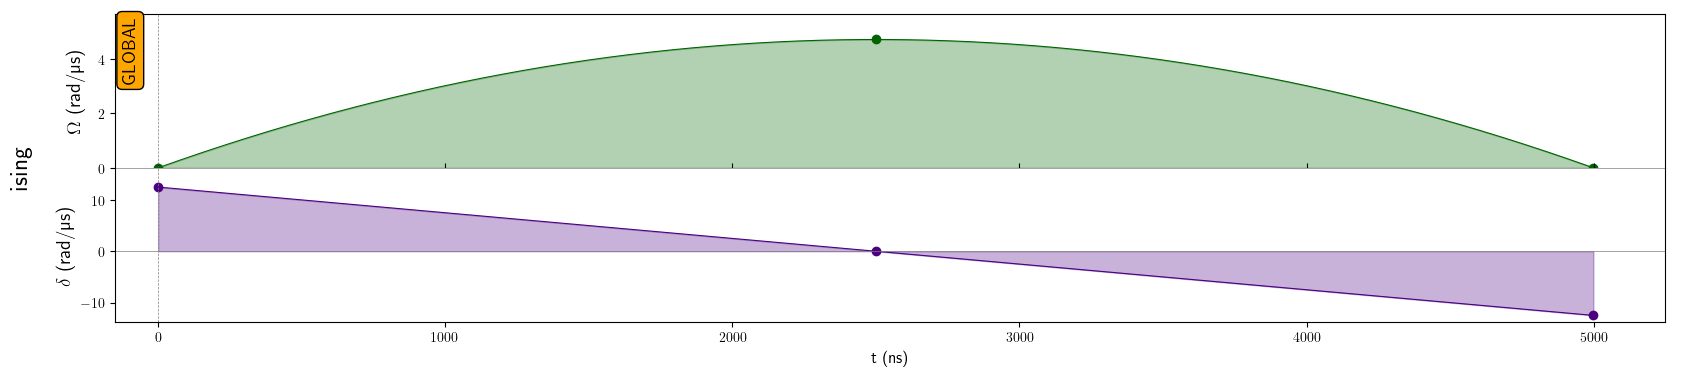

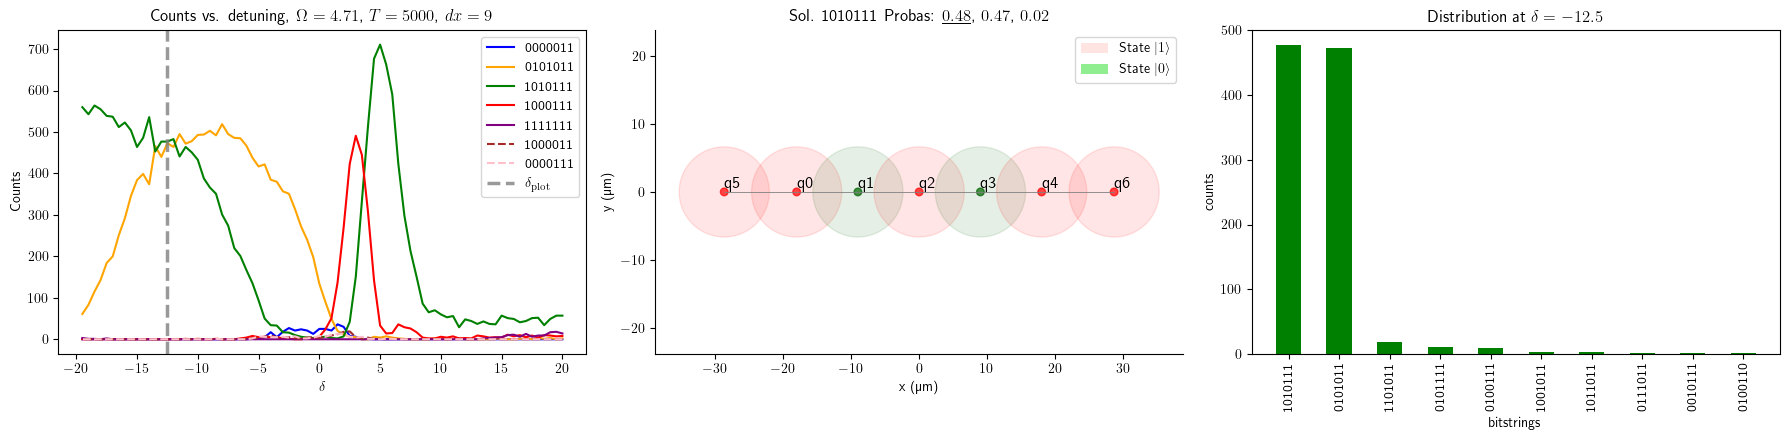

In [13]:
# longer times --> plot on the left smoother
# anchor closer -> 01010 more probable
# I don't know why choosing $\delta$ from + to - is needed here.
for dx in [9]:
    counts_vs_detuning_5_with_anchors(dx, -20, 20, 0.5, Omega = 1.5 * np.pi, T = 5000, adx=1.64)

# With Local Detuning
https://pulser.readthedocs.io/en/stable/tutorials/dmm.html

It is not so easy to find good detuning parameters.
For some reason it works better for me to have the global $\delta$ go from 12.5 to -12.5.    
Then, the local detunings are only applied on the inner atoms and the value is np.pi/20.0 * 20.0. No idea why this one works best.

In [3]:
import numpy as np

from dataclasses import replace

from matplotlib import pyplot as plt

from pulser.channels.dmm import DMM
from pulser.devices import AnalogDevice
from pulser.register import Register
from pulser.register.register_layout import RegisterLayout
from pulser.register.mappable_reg import MappableRegister
from pulser.register.weight_maps import DetuningMap
from pulser.sampler import sampler
from pulser.sequence import Sequence
from pulser.pulse import Pulse
from pulser.waveforms import ConstantWaveform, RampWaveform
from pulser.waveforms import InterpolatedWaveform
from pulser_simulation import QutipEmulator

{'dmm_0': DMM(addressing='Global', max_abs_detuning=None, max_amp=0, min_retarget_interval=None, fixed_retarget_t=None, max_targets=None, clock_period=4, min_duration=16, max_duration=67108864, min_avg_amp=0, mod_bandwidth=8, custom_phase_jump_time=None, eom_config=None, propagation_dir=None, bottom_detuning=-125.66370614359172, total_bottom_detuning=-18849.55592153876), 'dmm_1': DMM(addressing='Global', max_abs_detuning=None, max_amp=0, min_retarget_interval=None, fixed_retarget_t=None, max_targets=None, clock_period=1, min_duration=1, max_duration=100000000, min_avg_amp=0, mod_bandwidth=None, custom_phase_jump_time=None, eom_config=None, propagation_dir=None, bottom_detuning=None, total_bottom_detuning=None)}
{'dmm_0': DMM(addressing='Global', max_abs_detuning=None, max_amp=0, min_retarget_interval=None, fixed_retarget_t=None, max_targets=None, clock_period=4, min_duration=16, max_duration=67108864, min_avg_amp=0, mod_bandwidth=8, custom_phase_jump_time=None, eom_config=None, propaga

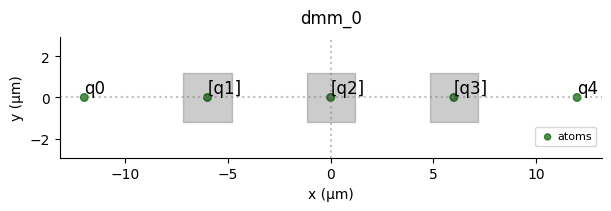

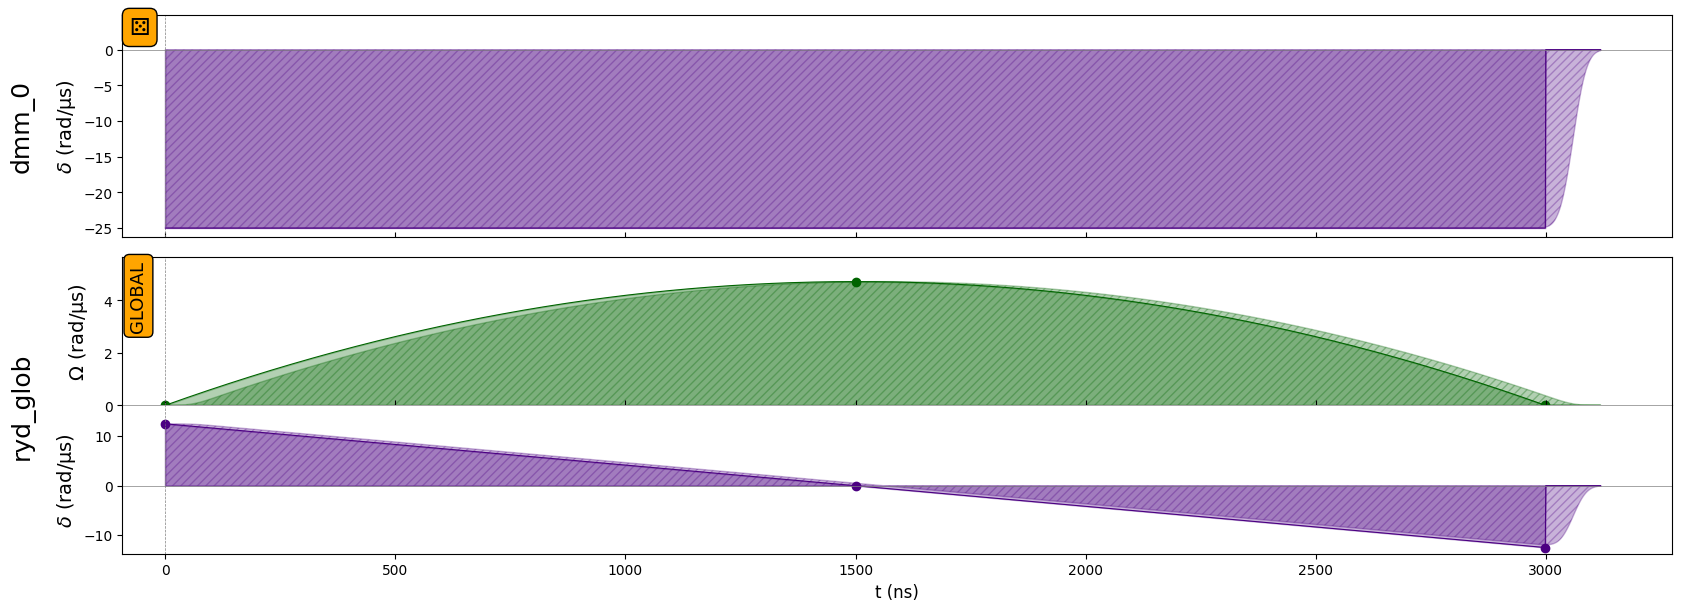

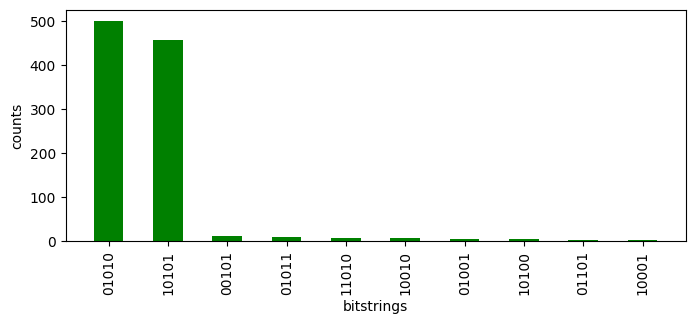

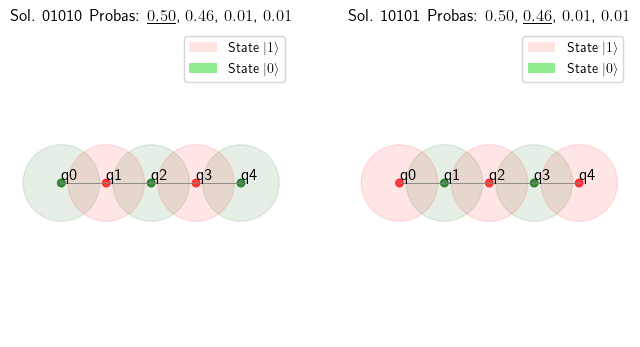

In [33]:
plt.rc("text", usetex=False)  # latex error in register.draw else

dx = 6
coords = [
    [-2*dx, 0], 
    [-dx, 0], 
    [0, 0], 
    [dx, 0],
    [2*dx, 0], 
    ]
qubits = {f"q{i}": coord for (i, coord) in enumerate(coords)}
T = 3000

detuning_val = -25. # detuning between 0 and -20 MHz
dd = np.pi/np.abs(detuning_val) # how much detuning to apply to each trap
trap_coordinates = coords
weights_1 = [0.0, dd, dd, dd, dd, 0.0]  # between 0 and 1

register_layout = RegisterLayout(trap_coordinates)
detuning_map = register_layout.define_detuning_map(
    {i: weights_1[i] for i in range(4)}  # mapping between trap ids and weights
)

register = Register.from_coordinates(
    trap_coordinates, center=False, prefix="q"
)

dmm = DMM(
    clock_period=4,
    min_duration=16,
    max_duration=2**26,
    mod_bandwidth=8,
    bottom_detuning=-2 * np.pi * 20,  # detuning between 0 and -20 MHz
    total_bottom_detuning=-2 * np.pi * T,  # total detuning
)
mock_device = replace(
    AnalogDevice.to_virtual(),
    dmm_objects=(dmm, DMM()),
    reusable_channels=True,
)

seq = Sequence(register, mock_device)
seq.config_detuning_map(detuning_map, "dmm_0")
print(mock_device.dmm_channels)
print(seq.declared_channels)

seq.add_dmm_detuning(ConstantWaveform(T, detuning_val), "dmm_0") # detuning between 0 and -20 MHz. Multiply by above weights

Omega = 1.5 * np.pi
delta_i = 12.5
delta_f = -delta_i
adiabatic_pulse = Pulse(
    InterpolatedWaveform(T, [1e-9, Omega, 1e-9]),
    InterpolatedWaveform(T, [delta_i, 0, delta_f]),
    0,
)

seq.declare_channel("ryd_glob", "rydberg_global")
seq.add(adiabatic_pulse, "ryd_glob", protocol="no-delay")
seq.draw(draw_detuning_maps=True)

simul = QutipEmulator.from_sequence(seq)
results = simul.run()
final = results.get_final_state()
count_dict = results.sample_final_state()
plot_distribution(count_dict, show=True)
draw_solutions(register, count_dict, n=2, draw_graph=True, show=True, Omega=Omega)